### Detect Test

In [ ]:
# from ultralytics import YOLO

# model = YOLO("yolov8n.pt")
# results = model.predict(source='./imgs/naroho.jpg', save=True)

# 테스트 확인


image 1/1 c:\Users\main\workspace\vision\project\imgs\naroho.jpg: 640x448 1 clock, 20.4ms
Speed: 3.2ms preprocess, 20.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\predict


### 데이터셋 로드

In [ ]:
# Detect

from roboflow import Roboflow
rf = Roboflow(api_key="ElIox72mujQ8VOYKZdPN")
project = rf.workspace("roboflow-universe-projects").project("FireSmokeDetection")
version = project.version(4)
dataset = version.download("yolov8")
                

### Class Fire, fire 불이 두 개여서 하나로 통일

In [1]:
import os

# 라벨 경로 설정 (필요 시 절대경로로 바꿔도 됨)
label_dirs = [
    "FireSmokeDetection-v3/train/labels",
    "FireSmokeDetection-v3/valid/labels",
    "FireSmokeDetection-v3/test/labels"
]

# 클래스 ID 매핑: 기존 → 새 ID
class_mapping = {
    0: 0,  # Fire → fire 로 통일
    1: 0,  # fire → fire
    2: 1   # smoke → smoke
}

def convert_label_file(filepath):
    new_lines = []
    with open(filepath, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            old_class_id = int(parts[0])
            if old_class_id in class_mapping:
                new_class_id = class_mapping[old_class_id]
                new_line = " ".join([str(new_class_id)] + parts[1:]) + "\n"
                new_lines.append(new_line)
            else:
                print(f"❌ Unknown class_id {old_class_id} in {filepath}, skipping...")

    with open(filepath, 'w') as f:
        f.writelines(new_lines)

# 모든 라벨 파일 변환 실행
for label_dir in label_dirs:
    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            full_path = os.path.join(label_dir, file)
            convert_label_file(full_path)
            print(f"✅ Converted: {full_path}")


✅ Converted: FireSmokeDetection-v3/train/labels\0050_jpg.rf.a476234ec70f9bf5e0e3b209437bc437.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0052_jpg.rf.7d37278344ea93356ce48738eec51f1f.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0052_jpg.rf.ef511de548b9ccd2d25b2daa792094f1.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0054_jpg.rf.820c5632b276560b902f2081db1b1f39.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0055_jpg.rf.9dbeefb2c7ae3b511560a39315340064.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0056_JPG_jpg.rf.51752821c1a276eee911587e85858f4b.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0056_JPG_jpg.rf.993e4f2b5cafc47ac9d538a9c66cacb5.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0057_JPG_jpg.rf.44dc2ad3abe2f0a13ac5b4d5a92a9976.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0058_jpg.rf.004207d773a6f976df42704e4183adb5.txt
✅ Converted: FireSmokeDetection-v3/train/labels\0058_jpg.rf.7bc6840d903207f8fa50109a64e3274a.txt
✅ Converted: FireS

### GPU 설정

In [3]:
import torch
print(torch.cuda.is_available())  # True면 GPU 사용 가능
print(torch.cuda.get_device_name(0))  # 그래픽카드 이름

True
NVIDIA GeForce RTX 3070 Ti Laptop GPU


### 모델 학습

#### train

In [1]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("yolov8n.pt")

# 2. 학습 시작
model.train(
    data="FireSmokeDetection-4/data.yaml",
    epochs=100,
    patience=10,
    imgsz=640,
    batch=16, # 메모리에 따라 조절 (CPU=4~8, GPU=16~32)
    project="runs", # 결과 저장 경로
    name="firesmoke_train", # 실험 이름
    resume=False # 중단된 학습 이어서 할 건지 여부
)

New https://pypi.org/project/ultralytics/8.3.152 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=FireSmokeDetection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_train, nbs=64

100%|██████████| 5.35M/5.35M [00:00<00:00, 63.2MB/s]


AMP: checks passed 
train: Fast image access  (ping: 0.10.0 ms, read: 5.02.4 MB/s, size: 34.0 KB)


train: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels... 4758 images, 23 backgrounds, 0 corrupt: 100%|██████████| 4758/4758 [00:13<00:00, 352.84it/s]


train: New cache created: C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 9582. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.10.0 ms, read: 3.41.0 MB/s, size: 44.1 KB)


val: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:03<00:00, 291.28it/s]

val: New cache created: C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels.cache


Plotting labels to runs\firesmoke_train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\firesmoke_train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.02G      1.872      2.918      1.763         23        640: 100%|██████████| 298/298 [00:34<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.53it/s]

                   all       1087       1937      0.258      0.235      0.178      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.35G      1.865      2.269      1.747         12        640: 100%|██████████| 298/298 [00:31<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.55it/s]


                   all       1087       1937      0.314      0.258      0.229      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.36G      1.878      2.141      1.767         25        640: 100%|██████████| 298/298 [00:32<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.39it/s]


                   all       1087       1937      0.403      0.236      0.252      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.36G      1.855      2.012      1.737         14        640: 100%|██████████| 298/298 [00:31<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.05it/s]


                   all       1087       1937      0.361      0.327      0.306      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      1.794      1.862      1.693         16        640: 100%|██████████| 298/298 [00:32<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.23it/s]


                   all       1087       1937       0.48      0.302        0.3      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.36G      1.772      1.807      1.677         24        640: 100%|██████████| 298/298 [00:31<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.90it/s]

                   all       1087       1937      0.484      0.343      0.361      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      1.743       1.73      1.644         12        640: 100%|██████████| 298/298 [00:37<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.05it/s]


                   all       1087       1937      0.584      0.364      0.382      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.36G      1.733      1.708      1.631         15        640: 100%|██████████| 298/298 [00:32<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.06it/s]

                   all       1087       1937      0.481      0.435       0.42      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G      1.702      1.631      1.596         18        640: 100%|██████████| 298/298 [00:32<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]

                   all       1087       1937      0.639      0.375        0.4      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G      1.689       1.62      1.592         27        640: 100%|██████████| 298/298 [00:33<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]

                   all       1087       1937      0.462      0.387      0.393      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G      1.667       1.58      1.563         25        640: 100%|██████████| 298/298 [00:33<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.42it/s]


                   all       1087       1937      0.401      0.388      0.384      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G      1.649      1.542       1.56         21        640: 100%|██████████| 298/298 [00:33<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.59it/s]


                   all       1087       1937       0.49      0.432      0.415        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G      1.635      1.528       1.55         29        640: 100%|██████████| 298/298 [00:34<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]

                   all       1087       1937      0.497      0.412      0.423      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G      1.621      1.491      1.535         15        640: 100%|██████████| 298/298 [00:33<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]

                   all       1087       1937       0.39      0.421      0.362      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G      1.613       1.48      1.535         18        640: 100%|██████████| 298/298 [00:32<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.98it/s]

                   all       1087       1937      0.542      0.402      0.426       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G      1.618      1.458      1.533         11        640: 100%|██████████| 298/298 [00:31<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.45it/s]


                   all       1087       1937      0.466      0.403      0.412      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G      1.585      1.401       1.51         27        640: 100%|██████████| 298/298 [00:31<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.43it/s]


                   all       1087       1937      0.588      0.445      0.459      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G      1.591      1.396      1.503         15        640: 100%|██████████| 298/298 [00:31<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.54it/s]


                   all       1087       1937      0.539      0.432      0.435      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G      1.588      1.394      1.505         19        640: 100%|██████████| 298/298 [00:31<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.31it/s]


                   all       1087       1937      0.543      0.425      0.449      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G      1.557      1.353      1.478         12        640: 100%|██████████| 298/298 [00:32<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.11it/s]


                   all       1087       1937      0.493      0.448      0.445      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G      1.564      1.379      1.494         20        640: 100%|██████████| 298/298 [00:32<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.07it/s]


                   all       1087       1937      0.525      0.431      0.448      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G      1.542      1.349      1.478         12        640: 100%|██████████| 298/298 [00:33<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.70it/s]


                   all       1087       1937      0.568      0.433      0.448      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.36G      1.543      1.328      1.476         18        640: 100%|██████████| 298/298 [00:31<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.68it/s]


                   all       1087       1937      0.559       0.44       0.46      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.36G      1.517       1.31      1.456         23        640: 100%|██████████| 298/298 [00:31<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.55it/s]


                   all       1087       1937       0.48      0.431      0.431      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G      1.511       1.28      1.461         19        640: 100%|██████████| 298/298 [00:31<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.27it/s]

                   all       1087       1937      0.565      0.427      0.457      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G       1.52      1.288      1.463         14        640: 100%|██████████| 298/298 [00:31<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.46it/s]


                   all       1087       1937      0.571      0.485      0.489      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G      1.517      1.266      1.451         30        640: 100%|██████████| 298/298 [00:32<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.61it/s]

                   all       1087       1937      0.504      0.466      0.439      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.36G      1.488      1.235      1.428         22        640: 100%|██████████| 298/298 [00:31<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.62it/s]


                   all       1087       1937      0.615      0.454      0.473      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G      1.475      1.226      1.427         22        640: 100%|██████████| 298/298 [00:33<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.68it/s]


                   all       1087       1937      0.563      0.488      0.489      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G      1.479      1.212      1.428         31        640: 100%|██████████| 298/298 [00:31<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.70it/s]


                   all       1087       1937      0.584      0.464      0.475      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G      1.477      1.212      1.423         10        640: 100%|██████████| 298/298 [00:31<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.80it/s]

                   all       1087       1937      0.598      0.463      0.483      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.36G      1.474      1.207       1.42         24        640: 100%|██████████| 298/298 [00:31<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.27it/s]

                   all       1087       1937      0.571       0.46      0.478      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G       1.47      1.199      1.419         17        640: 100%|██████████| 298/298 [00:33<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.72it/s]

                   all       1087       1937      0.503      0.434       0.43       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G      1.462      1.171       1.41         19        640: 100%|██████████| 298/298 [00:31<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.42it/s]


                   all       1087       1937      0.544      0.458      0.435       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.38G      1.441      1.159      1.398         26        640: 100%|██████████| 298/298 [00:31<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.47it/s]


                   all       1087       1937      0.557      0.455      0.467      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.39G      1.439       1.14      1.396         23        640: 100%|██████████| 298/298 [00:32<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.70it/s]


                   all       1087       1937      0.583      0.465      0.483      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.39G      1.425      1.133      1.381         22        640: 100%|██████████| 298/298 [00:32<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.47it/s]


                   all       1087       1937      0.526      0.488      0.475       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.39G      1.433      1.142       1.39          7        640: 100%|██████████| 298/298 [00:31<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.75it/s]


                   all       1087       1937      0.573      0.455      0.469       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.39G      1.422      1.124      1.384         10        640: 100%|██████████| 298/298 [00:30<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:04<00:00,  6.80it/s]


                   all       1087       1937      0.602      0.481      0.489       0.25
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 29, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

39 epochs completed in 0.415 hours.
Optimizer stripped from runs\firesmoke_train\weights\last.pt, 6.2MB
Optimizer stripped from runs\firesmoke_train\weights\best.pt, 6.2MB

Validating runs\firesmoke_train\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.02it/s]


                   all       1087       1937      0.565      0.488      0.489      0.252
                  Fire        191        355      0.783      0.865      0.877      0.514
                  fire        337        768      0.422      0.443      0.386      0.162
                 smoke        728        814      0.489      0.157      0.204     0.0803
Speed: 0.2ms preprocess, 1.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\firesmoke_train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FF97BA8440>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

### 결과 시각화

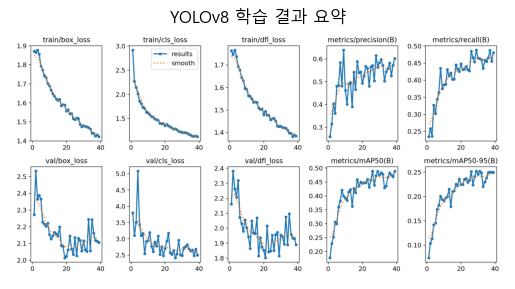

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_train/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()


#### tuned

In [5]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("yolov8n.pt")

# 2. 학습 시작
model.train(
    data="FireSmokeDetection-4/data.yaml",
    epochs=120,
    imgsz = 768, # 이미지 크기 증가 (연기 표현 향상 예상)
    patience=15, # EarlyStoping 살짝 여유 있게
    batch=16, # 메모리에 따라 조절 (CPU=4~8, GPU=16~32)
    lr0=0.001, # 초기 학습률 낮게
    optimizer='AdamW', # 안정적 수렴
    dropout=0.1, # 경량 모델에서 과적합 방지
    warmup_epochs=3, # 초기 안정화
    device=0,
    project="runs", # 결과 저장 경로
    name="firesmoke_detect_tuned1", # 실험 이름
    resume=False # 중단된 학습 이어서 할 건지 여부
)

New https://pypi.org/project/ultralytics/8.3.152 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=FireSmokeDetection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_detect_tuned1, 

train: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels.cache... 4758 images, 23 backgrounds, 0 corrupt: 100%|██████████| 4758/4758 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 9582. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 0.20.1 ms, read: 76.410.3 MB/s, size: 44.1 KB)


val: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels.cache... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:00<?, ?it/s]


Plotting labels to runs\firesmoke_detect_tuned1\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs\firesmoke_detect_tuned1
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      2.92G      1.918      2.749      1.878         23        768: 100%|██████████| 298/298 [01:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.51it/s]

                   all       1087       1937      0.204      0.167      0.142     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      3.36G      1.866      2.208      1.832         12        768: 100%|██████████| 298/298 [01:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.49it/s]


                   all       1087       1937      0.288      0.272      0.218     0.0909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      3.38G      1.855      2.127      1.831         25        768: 100%|██████████| 298/298 [01:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]

                   all       1087       1937      0.433      0.303      0.294      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      3.38G       1.83      2.001      1.802         14        768: 100%|██████████| 298/298 [01:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.42it/s]


                   all       1087       1937      0.514      0.318      0.308       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      3.38G      1.764      1.883       1.76         16        768: 100%|██████████| 298/298 [01:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.49it/s]

                   all       1087       1937      0.368      0.373      0.335      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      3.38G       1.76       1.85      1.749         24        768: 100%|██████████| 298/298 [01:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.49it/s]

                   all       1087       1937      0.467      0.345      0.341      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      3.38G      1.728      1.764       1.71         12        768: 100%|██████████| 298/298 [01:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]

                   all       1087       1937      0.517      0.389      0.398      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      3.38G      1.721      1.725      1.702         15        768: 100%|██████████| 298/298 [01:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.41it/s]

                   all       1087       1937      0.368      0.361       0.34      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      3.38G      1.693      1.673      1.675         18        768: 100%|██████████| 298/298 [01:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.42it/s]


                   all       1087       1937      0.401      0.351      0.334      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      3.38G      1.673      1.641      1.659         27        768: 100%|██████████| 298/298 [01:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.52it/s]

                   all       1087       1937      0.454      0.404      0.391      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      3.38G      1.663       1.61       1.64         25        768: 100%|██████████| 298/298 [01:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.47it/s]

                   all       1087       1937      0.484      0.364      0.377      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      3.38G      1.639      1.573       1.63         21        768: 100%|██████████| 298/298 [01:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.42it/s]

                   all       1087       1937      0.527      0.398      0.394      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      3.38G      1.627      1.561      1.618         29        768: 100%|██████████| 298/298 [01:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.52it/s]

                   all       1087       1937       0.51      0.433      0.434      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      3.38G      1.619      1.538      1.616         15        768: 100%|██████████| 298/298 [01:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.53it/s]

                   all       1087       1937      0.582      0.408      0.428      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      3.39G       1.61      1.523      1.619         18        768: 100%|██████████| 298/298 [01:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.56it/s]

                   all       1087       1937      0.506      0.428      0.416      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      3.39G      1.621      1.504      1.614         11        768: 100%|██████████| 298/298 [01:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.49it/s]

                   all       1087       1937      0.492      0.437      0.422      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      3.39G      1.578      1.454      1.582         27        768: 100%|██████████| 298/298 [01:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.55it/s]

                   all       1087       1937      0.506       0.46      0.445      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      3.39G      1.577      1.433      1.568         15        768: 100%|██████████| 298/298 [01:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.49it/s]

                   all       1087       1937      0.574      0.413      0.431      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      3.41G      1.584      1.429      1.581         19        768: 100%|██████████| 298/298 [01:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.44it/s]

                   all       1087       1937      0.506      0.452      0.457      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      3.43G      1.561      1.392      1.551         12        768: 100%|██████████| 298/298 [01:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.52it/s]

                   all       1087       1937      0.558       0.42       0.44      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      3.43G      1.552      1.415      1.558         20        768: 100%|██████████| 298/298 [01:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.45it/s]

                   all       1087       1937      0.537      0.459      0.463      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      3.43G      1.534      1.381      1.539         12        768: 100%|██████████| 298/298 [01:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.50it/s]

                   all       1087       1937      0.564      0.423      0.439      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      3.43G      1.543      1.369      1.545         18        768: 100%|██████████| 298/298 [01:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.47it/s]

                   all       1087       1937      0.503      0.446      0.436       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      3.43G      1.526      1.351      1.537         23        768: 100%|██████████| 298/298 [01:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.44it/s]

                   all       1087       1937        0.5      0.452      0.439      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      3.43G      1.514      1.318      1.528         19        768: 100%|██████████| 298/298 [01:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]

                   all       1087       1937      0.451      0.453      0.412       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      3.43G      1.509      1.328      1.531         14        768: 100%|██████████| 298/298 [01:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]

                   all       1087       1937      0.559      0.458      0.469      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      3.43G      1.515      1.305       1.52         30        768: 100%|██████████| 298/298 [01:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.40it/s]

                   all       1087       1937      0.567       0.46      0.462      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      3.43G      1.493      1.279      1.505         22        768: 100%|██████████| 298/298 [01:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.44it/s]

                   all       1087       1937      0.507      0.438      0.439      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      3.43G      1.488       1.27      1.498         22        768: 100%|██████████| 298/298 [01:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]

                   all       1087       1937      0.545      0.457      0.463      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      3.43G      1.475      1.243      1.492         31        768: 100%|██████████| 298/298 [01:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.22it/s]

                   all       1087       1937      0.545      0.478      0.465      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      3.43G      1.485      1.248        1.5         10        768: 100%|██████████| 298/298 [00:41<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.46it/s]

                   all       1087       1937      0.569      0.461      0.481      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      3.43G      1.474      1.237      1.498         24        768: 100%|██████████| 298/298 [00:41<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.35it/s]


                   all       1087       1937      0.582       0.45      0.472       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      3.43G      1.466      1.227      1.489         17        768: 100%|██████████| 298/298 [00:41<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.38it/s]


                   all       1087       1937      0.623      0.439       0.46      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      3.43G      1.458      1.209      1.484         19        768: 100%|██████████| 298/298 [00:41<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.45it/s]


                   all       1087       1937      0.532      0.484      0.483       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      3.43G      1.455      1.206      1.476         26        768: 100%|██████████| 298/298 [00:41<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.46it/s]

                   all       1087       1937      0.559      0.459      0.479      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      3.43G      1.443      1.181      1.464         23        768: 100%|██████████| 298/298 [00:41<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.18it/s]


                   all       1087       1937      0.606       0.46      0.476      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      3.43G      1.431      1.174      1.459         22        768: 100%|██████████| 298/298 [00:42<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.46it/s]

                   all       1087       1937      0.557      0.461       0.48      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      3.43G      1.434      1.172      1.463          7        768: 100%|██████████| 298/298 [00:41<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.36it/s]


                   all       1087       1937      0.546      0.459       0.45      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      3.43G      1.419      1.152      1.446         10        768: 100%|██████████| 298/298 [00:41<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.79it/s]


                   all       1087       1937       0.62       0.46      0.483      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      3.43G      1.433      1.157      1.453         19        768: 100%|██████████| 298/298 [00:41<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.28it/s]

                   all       1087       1937      0.572       0.48      0.488      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      3.43G      1.412      1.143      1.443         26        768: 100%|██████████| 298/298 [00:41<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]

                   all       1087       1937       0.53      0.494      0.487      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      3.43G      1.404      1.126       1.44         16        768: 100%|██████████| 298/298 [00:55<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       1087       1937      0.567      0.464      0.473      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      3.43G      1.392      1.122      1.432         28        768: 100%|██████████| 298/298 [01:07<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.612      0.446      0.484      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      3.43G      1.376      1.108      1.419         11        768: 100%|██████████| 298/298 [01:10<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.11it/s]

                   all       1087       1937      0.599      0.494        0.5      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      3.43G      1.381      1.113      1.423         20        768: 100%|██████████| 298/298 [01:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.08it/s]

                   all       1087       1937      0.594      0.452      0.468      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      3.43G      1.379      1.089       1.42         21        768: 100%|██████████| 298/298 [01:09<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:20<00:00,  1.69it/s]

                   all       1087       1937      0.616      0.462      0.488      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      3.43G      1.384      1.089      1.413         33        768: 100%|██████████| 298/298 [01:20<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.78it/s]

                   all       1087       1937      0.575      0.482      0.491      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      3.43G      1.363      1.064      1.405         27        768: 100%|██████████| 298/298 [01:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]

                   all       1087       1937      0.587      0.491      0.494      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      3.43G      1.361       1.06      1.402         10        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       1087       1937      0.611      0.468      0.485      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      3.43G       1.36      1.049        1.4         25        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]

                   all       1087       1937      0.592      0.487      0.485      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      3.43G      1.363      1.058      1.404         28        768: 100%|██████████| 298/298 [01:33<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.31it/s]

                   all       1087       1937      0.572       0.49      0.488      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      3.43G      1.352      1.037      1.389         37        768: 100%|██████████| 298/298 [01:35<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:25<00:00,  1.33it/s]

                   all       1087       1937      0.577      0.484      0.492      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      3.43G      1.329       1.02      1.375         20        768: 100%|██████████| 298/298 [01:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.607      0.494      0.502      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      3.43G      1.332       1.02      1.378         14        768: 100%|██████████| 298/298 [01:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]


                   all       1087       1937      0.603      0.492      0.509      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      3.43G       1.32      1.003       1.37         26        768: 100%|██████████| 298/298 [01:33<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:27<00:00,  1.24it/s]

                   all       1087       1937      0.587      0.492        0.5       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      3.43G      1.316      1.004      1.368         24        768: 100%|██████████| 298/298 [01:35<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:26<00:00,  1.30it/s]

                   all       1087       1937       0.61      0.494      0.509      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      3.43G      1.312          1      1.368         22        768: 100%|██████████| 298/298 [01:19<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.05it/s]

                   all       1087       1937      0.575      0.491      0.493      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      3.43G      1.315      0.988      1.369         14        768: 100%|██████████| 298/298 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.09it/s]

                   all       1087       1937      0.635      0.505       0.52      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      3.43G      1.307     0.9655      1.355         27        768: 100%|██████████| 298/298 [01:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]

                   all       1087       1937      0.612      0.504      0.517      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      3.43G      1.299     0.9661      1.357         24        768: 100%|██████████| 298/298 [01:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.09it/s]

                   all       1087       1937      0.601        0.5      0.505      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      3.43G      1.296     0.9667      1.356         20        768: 100%|██████████| 298/298 [01:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]

                   all       1087       1937      0.649      0.491      0.524       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      3.43G      1.288     0.9516      1.345         37        768: 100%|██████████| 298/298 [01:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.08it/s]

                   all       1087       1937      0.598      0.507      0.513       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      3.43G      1.285     0.9544       1.34         26        768: 100%|██████████| 298/298 [01:17<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:22<00:00,  1.50it/s]

                   all       1087       1937      0.574      0.486        0.5      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      3.43G      1.271     0.9421      1.333         22        768: 100%|██████████| 298/298 [01:24<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:21<00:00,  1.61it/s]

                   all       1087       1937      0.607      0.489      0.514       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      3.43G       1.27     0.9441      1.339         17        768: 100%|██████████| 298/298 [01:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.607      0.486      0.511      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      3.43G      1.281     0.9356      1.331         20        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]

                   all       1087       1937      0.613      0.504      0.524      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      3.43G      1.273      0.922      1.329         14        768: 100%|██████████| 298/298 [01:08<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.621      0.497      0.507       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      3.43G      1.253      0.909      1.323         11        768: 100%|██████████| 298/298 [01:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.11it/s]

                   all       1087       1937      0.597      0.498      0.504      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      3.43G      1.264     0.9158      1.329         12        768: 100%|██████████| 298/298 [01:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       1087       1937      0.617       0.51      0.513      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      3.43G      1.248     0.9116      1.318         16        768: 100%|██████████| 298/298 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.10it/s]

                   all       1087       1937      0.605      0.516      0.511      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      3.43G      1.242     0.8961      1.307         14        768: 100%|██████████| 298/298 [01:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.624        0.5      0.515      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      3.43G      1.231     0.8869      1.304         20        768: 100%|██████████| 298/298 [01:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1087       1937      0.619      0.497      0.515      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      3.43G      1.238     0.8864      1.303         10        768: 100%|██████████| 298/298 [01:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       1087       1937      0.637      0.509      0.525      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      3.43G      1.227     0.8797      1.296         16        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.626      0.503      0.519      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      3.43G      1.231     0.8863      1.301         16        768: 100%|██████████| 298/298 [01:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       1087       1937      0.615      0.515       0.52      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      3.43G       1.21     0.8649      1.289         31        768: 100%|██████████| 298/298 [01:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.612      0.509      0.514      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      3.43G      1.211     0.8487      1.285         23        768: 100%|██████████| 298/298 [01:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.635      0.499      0.515      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      3.43G      1.211     0.8494      1.284         21        768: 100%|██████████| 298/298 [01:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1087       1937      0.605      0.516      0.514      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      3.43G      1.207      0.861      1.286         19        768: 100%|██████████| 298/298 [03:25<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.643       0.48      0.513      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      3.43G      1.193     0.8345      1.274         18        768: 100%|██████████| 298/298 [01:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1087       1937      0.659      0.496      0.519      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      3.43G      1.201     0.8436      1.279         33        768: 100%|██████████| 298/298 [01:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.674      0.491      0.523      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      3.43G      1.187     0.8307      1.274          8        768: 100%|██████████| 298/298 [01:07<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       1087       1937      0.645      0.496       0.52       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      3.43G      1.196     0.8375      1.273         17        768: 100%|██████████| 298/298 [01:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:24<00:00,  1.37it/s]

                   all       1087       1937      0.646      0.512       0.53      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      3.43G      1.195     0.8332      1.273         13        768: 100%|██████████| 298/298 [01:33<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:24<00:00,  1.39it/s]

                   all       1087       1937      0.615      0.532      0.533      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      3.43G      1.178     0.8127      1.263         25        768: 100%|██████████| 298/298 [01:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:18<00:00,  1.86it/s]

                   all       1087       1937       0.63      0.513      0.525       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      3.43G      1.165     0.8036      1.259         16        768: 100%|██████████| 298/298 [01:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1087       1937      0.614      0.531       0.53      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      3.43G       1.17     0.8171      1.259         11        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:20<00:00,  1.66it/s]

                   all       1087       1937      0.634      0.508      0.522      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      3.43G      1.164     0.8001      1.257          7        768: 100%|██████████| 298/298 [01:39<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:27<00:00,  1.23it/s]

                   all       1087       1937      0.605      0.512      0.514      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      3.43G      1.161     0.7983      1.254         14        768: 100%|██████████| 298/298 [01:33<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:27<00:00,  1.24it/s]

                   all       1087       1937      0.614      0.508      0.513       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      3.43G      1.158     0.7861      1.246         17        768: 100%|██████████| 298/298 [01:16<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       1087       1937      0.666      0.492      0.525      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      3.43G       1.15     0.7846      1.247         24        768: 100%|██████████| 298/298 [01:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]

                   all       1087       1937      0.634      0.509      0.517      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      3.43G      1.152     0.7818      1.245         27        768: 100%|██████████| 298/298 [01:08<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.627      0.513      0.519      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      3.43G      1.153     0.7918      1.249         18        768: 100%|██████████| 298/298 [01:08<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1087       1937      0.621      0.521      0.521      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      3.43G      1.138     0.7815      1.242         17        768: 100%|██████████| 298/298 [01:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1087       1937      0.623       0.51       0.52      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      3.43G      1.137     0.7691      1.237         25        768: 100%|██████████| 298/298 [01:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937       0.62      0.507      0.518      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      3.43G      1.129     0.7618      1.235         27        768: 100%|██████████| 298/298 [01:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.638      0.507      0.518      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      3.43G      1.127     0.7645      1.231         17        768: 100%|██████████| 298/298 [01:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]

                   all       1087       1937      0.639      0.512      0.518      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      3.43G      1.118     0.7475      1.224         20        768: 100%|██████████| 298/298 [01:09<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.633      0.508      0.517      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      3.43G      1.122     0.7532      1.227         20        768: 100%|██████████| 298/298 [01:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.651      0.502      0.517      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      3.43G      1.109      0.746      1.225         27        768: 100%|██████████| 298/298 [01:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.652      0.504      0.518      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      3.43G      1.125     0.7481      1.224         31        768: 100%|██████████| 298/298 [01:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.654      0.513      0.521      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      3.43G      1.102     0.7354      1.216         23        768: 100%|██████████| 298/298 [01:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       1087       1937      0.624      0.516      0.515      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      3.43G      1.105     0.7349      1.219         25        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.632      0.515      0.522      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      3.43G      1.098     0.7315      1.211         32        768: 100%|██████████| 298/298 [01:07<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.662      0.493      0.522      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      3.43G       1.09     0.7257      1.201         12        768: 100%|██████████| 298/298 [01:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1087       1937      0.689      0.487      0.525      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      3.43G      1.077     0.7125      1.198         14        768: 100%|██████████| 298/298 [01:07<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       1087       1937      0.669      0.488      0.521      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      3.43G      1.091     0.7179      1.209         26        768: 100%|██████████| 298/298 [01:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1087       1937      0.622      0.515      0.522      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      3.43G      1.088     0.7245      1.207         17        768: 100%|██████████| 298/298 [01:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1087       1937      0.649      0.502      0.522      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      3.43G       1.08     0.7187      1.208         29        768: 100%|██████████| 298/298 [01:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       1087       1937       0.65      0.503      0.517      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      3.43G      1.073     0.7038      1.193         20        768: 100%|██████████| 298/298 [01:09<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.653      0.506       0.52      0.299


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      3.43G      1.057     0.6373      1.206         17        768: 100%|██████████| 298/298 [01:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       1087       1937      0.655      0.506       0.52      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      3.43G      1.026     0.6159      1.185         17        768: 100%|██████████| 298/298 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       1087       1937      0.658      0.507       0.52      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      3.43G      1.026     0.6059      1.186          9        768: 100%|██████████| 298/298 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.02it/s]

                   all       1087       1937      0.646       0.51      0.524      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      3.43G       1.02     0.5974      1.187          9        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.653      0.513      0.522      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      3.43G      1.018     0.5928      1.176         13        768: 100%|██████████| 298/298 [01:07<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]

                   all       1087       1937       0.65      0.509      0.522      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      3.43G      1.007     0.5865      1.175         15        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.661        0.5       0.52      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      3.43G      1.001     0.5879      1.172         14        768: 100%|██████████| 298/298 [01:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       1087       1937      0.682      0.499      0.528      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      3.43G     0.9978     0.5774      1.163          9        768: 100%|██████████| 298/298 [01:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       1087       1937      0.688        0.5      0.525      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      3.43G      1.001     0.5721      1.164         19        768: 100%|██████████| 298/298 [01:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.667      0.506      0.524      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      3.43G     0.9954     0.5708      1.163         15        768: 100%|██████████| 298/298 [01:08<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.678      0.502      0.523      0.302



120 epochs completed in 2.801 hours.
Optimizer stripped from runs\firesmoke_detect_tuned1\weights\last.pt, 6.3MB
Optimizer stripped from runs\firesmoke_detect_tuned1\weights\best.pt, 6.3MB

Validating runs\firesmoke_detect_tuned1\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.97it/s]


                   all       1087       1937       0.68      0.499      0.527      0.302
                  Fire        191        355      0.936      0.909       0.95      0.635
                  fire        337        768      0.549      0.423      0.425      0.195
                 smoke        728        814      0.554      0.165      0.208     0.0764
Speed: 0.4ms preprocess, 2.2ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs\firesmoke_detect_tuned1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001A789923B90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

### 결과 시각화

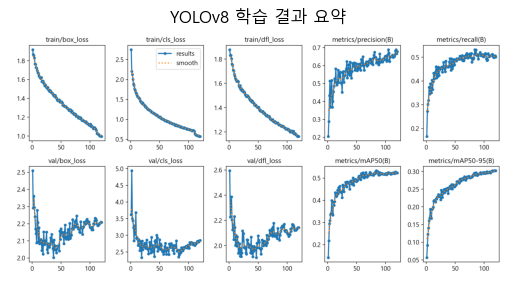

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_detect_tuned1/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()


### 라벨 정리 후

In [3]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("yolov8n.pt")

# 2. 학습 시작
model.train(
    data="FireSmokeDetection-4/data.yaml",
    epochs=100,
    patience=10,
    imgsz=640,
    batch=16, # 메모리에 따라 조절 (CPU=4~8, GPU=16~32)
    project="runs", # 결과 저장 경로
    name="firesmoke_train2", # 실험 이름
    resume=False # 중단된 학습 이어서 할 건지 여부
)

New https://pypi.org/project/ultralytics/8.3.153 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=FireSmokeDetection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_train2, nbs=6

train: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels... 4758 images, 23 backgrounds, 0 corrupt: 100%|██████████| 4758/4758 [00:11<00:00, 431.80it/s]


train: New cache created: C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 9582. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.30.1 ms, read: 37.019.3 MB/s, size: 44.1 KB)


val: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:02<00:00, 423.13it/s]

val: New cache created: C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels.cache


Plotting labels to runs\firesmoke_train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\firesmoke_train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.09G      1.876      2.661      1.784         23        640: 100%|██████████| 298/298 [01:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]


                   all       1087       1937       0.68      0.157      0.133      0.052

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.43G      1.894      2.157      1.771         12        640: 100%|██████████| 298/298 [00:59<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       1087       1937      0.382      0.168      0.112     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.43G      1.911      2.087      1.791         25        640: 100%|██████████| 298/298 [00:56<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]


                   all       1087       1937      0.691      0.143      0.131     0.0548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.44G      1.888      1.979      1.776         14        640: 100%|██████████| 298/298 [00:56<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.31it/s]

                   all       1087       1937      0.259      0.223      0.192     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.44G      1.814      1.836      1.718         16        640: 100%|██████████| 298/298 [00:54<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]

                   all       1087       1937      0.438      0.248      0.235      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.44G      1.796      1.793      1.694         24        640: 100%|██████████| 298/298 [00:55<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       1087       1937      0.347      0.258      0.233     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.44G      1.762      1.726      1.664         12        640: 100%|██████████| 298/298 [00:55<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       1087       1937      0.426      0.322      0.298      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.44G      1.756      1.716      1.669         15        640: 100%|██████████| 298/298 [00:56<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]


                   all       1087       1937      0.361      0.274      0.254      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.44G      1.729      1.636      1.628         18        640: 100%|██████████| 298/298 [00:56<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.40it/s]

                   all       1087       1937      0.431      0.274      0.268      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.44G      1.705      1.604      1.605         27        640: 100%|██████████| 298/298 [00:56<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]

                   all       1087       1937      0.308      0.292      0.232      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.44G      1.691      1.572      1.591         25        640: 100%|██████████| 298/298 [00:55<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.55it/s]

                   all       1087       1937      0.361       0.27      0.258      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.44G      1.672       1.53      1.588         21        640: 100%|██████████| 298/298 [00:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       1087       1937      0.404      0.332       0.31      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.44G      1.643      1.502      1.568         29        640: 100%|██████████| 298/298 [00:55<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.45it/s]

                   all       1087       1937      0.355      0.362      0.315      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G      1.638      1.486      1.561         15        640: 100%|██████████| 298/298 [00:55<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]

                   all       1087       1937      0.452      0.295      0.303      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.44G      1.635      1.484      1.564         18        640: 100%|██████████| 298/298 [00:55<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]

                   all       1087       1937      0.374      0.304      0.285      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.44G       1.64      1.462      1.566         11        640: 100%|██████████| 298/298 [00:55<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]

                   all       1087       1937       0.41      0.316      0.284      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.44G      1.591       1.41      1.523         27        640: 100%|██████████| 298/298 [00:56<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]

                   all       1087       1937      0.449       0.35      0.338      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.44G      1.612      1.406      1.528         15        640: 100%|██████████| 298/298 [00:55<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.27it/s]

                   all       1087       1937      0.423      0.323      0.293      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.44G      1.601      1.395      1.535         19        640: 100%|██████████| 298/298 [00:55<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       1087       1937      0.435      0.378      0.363       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.44G      1.573      1.363      1.503         12        640: 100%|██████████| 298/298 [00:55<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.31it/s]

                   all       1087       1937      0.408       0.35      0.324      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.44G      1.573       1.38      1.509         20        640: 100%|██████████| 298/298 [00:55<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]

                   all       1087       1937       0.44      0.337      0.341      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.44G      1.565      1.353      1.497         12        640: 100%|██████████| 298/298 [00:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]

                   all       1087       1937      0.442      0.353      0.339      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.44G       1.57      1.335      1.499         18        640: 100%|██████████| 298/298 [00:55<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]

                   all       1087       1937       0.41      0.368      0.303      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.44G      1.544      1.328       1.49         23        640: 100%|██████████| 298/298 [00:55<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.31it/s]

                   all       1087       1937       0.42      0.325      0.243       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.44G      1.533      1.289      1.482         19        640: 100%|██████████| 298/298 [00:55<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]

                   all       1087       1937      0.447      0.349      0.338      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.44G      1.537      1.302      1.487         14        640: 100%|██████████| 298/298 [00:54<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]

                   all       1087       1937      0.528      0.335      0.354      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.44G      1.534      1.273      1.472         30        640: 100%|██████████| 298/298 [00:56<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]

                   all       1087       1937      0.394      0.325      0.279      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.44G      1.511      1.236      1.452         22        640: 100%|██████████| 298/298 [00:54<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]

                   all       1087       1937      0.403       0.37      0.314      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.45G      1.499      1.241      1.451         22        640: 100%|██████████| 298/298 [00:56<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       1087       1937      0.488      0.351      0.338      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.45G      1.488      1.226      1.441         31        640: 100%|██████████| 298/298 [00:55<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.51it/s]

                   all       1087       1937      0.537      0.351      0.381       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.45G      1.489      1.226      1.443         10        640: 100%|██████████| 298/298 [00:55<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]

                   all       1087       1937      0.444      0.365      0.312      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.45G      1.496       1.22      1.451         24        640: 100%|██████████| 298/298 [00:56<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.54it/s]

                   all       1087       1937      0.501      0.378      0.368      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.45G      1.483      1.214      1.445         17        640: 100%|██████████| 298/298 [00:56<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]

                   all       1087       1937      0.511      0.334      0.346      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.45G      1.472      1.176       1.43         19        640: 100%|██████████| 298/298 [00:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.35it/s]

                   all       1087       1937      0.533      0.346       0.37      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.45G      1.473      1.182      1.424         26        640: 100%|██████████| 298/298 [00:55<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       1087       1937      0.428      0.382      0.321       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.45G      1.463      1.164      1.421         23        640: 100%|██████████| 298/298 [00:55<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       1087       1937      0.506      0.363      0.379      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.45G      1.445      1.148      1.405         22        640: 100%|██████████| 298/298 [00:55<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.00it/s]

                   all       1087       1937      0.507      0.356      0.363      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.45G      1.449      1.147      1.407          7        640: 100%|██████████| 298/298 [00:55<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.31it/s]

                   all       1087       1937      0.457      0.367      0.363      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.45G      1.436      1.131      1.406         10        640: 100%|██████████| 298/298 [00:54<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]

                   all       1087       1937      0.482      0.343      0.357      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.45G      1.441      1.131       1.41         19        640: 100%|██████████| 298/298 [00:56<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]

                   all       1087       1937      0.547      0.351      0.374      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.46G      1.432      1.115      1.396         26        640: 100%|██████████| 298/298 [00:54<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       1087       1937      0.485       0.38      0.373      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.46G      1.417      1.109      1.398         16        640: 100%|██████████| 298/298 [00:56<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]

                   all       1087       1937       0.48      0.346      0.347       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.46G      1.411      1.095      1.384         28        640: 100%|██████████| 298/298 [00:55<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.40it/s]

                   all       1087       1937      0.451      0.374      0.356      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.46G      1.404      1.088      1.381         11        640: 100%|██████████| 298/298 [00:55<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]

                   all       1087       1937      0.412      0.385       0.32      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.46G      1.404      1.095      1.381         20        640: 100%|██████████| 298/298 [00:54<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]

                   all       1087       1937      0.516      0.391        0.4      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.46G      1.397      1.073      1.375         21        640: 100%|██████████| 298/298 [00:55<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]

                   all       1087       1937      0.496       0.38      0.378      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.46G      1.398      1.062      1.367         33        640: 100%|██████████| 298/298 [00:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.40it/s]

                   all       1087       1937      0.528      0.359      0.377      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.46G      1.378      1.035      1.354         27        640: 100%|██████████| 298/298 [00:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.27it/s]

                   all       1087       1937      0.523      0.399      0.392      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.46G      1.373      1.034      1.351         10        640: 100%|██████████| 298/298 [00:56<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]

                   all       1087       1937      0.507      0.376      0.362      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.46G      1.373      1.024      1.351         25        640: 100%|██████████| 298/298 [00:56<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.35it/s]

                   all       1087       1937      0.526      0.381      0.397      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.46G      1.369       1.03      1.353         28        640: 100%|██████████| 298/298 [00:55<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.53it/s]

                   all       1087       1937      0.534      0.392      0.396      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.46G      1.356      1.023      1.341         37        640: 100%|██████████| 298/298 [00:55<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]

                   all       1087       1937      0.537      0.392      0.414      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.46G      1.351      1.007      1.336         20        640: 100%|██████████| 298/298 [00:55<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]

                   all       1087       1937      0.515      0.376      0.386      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.46G      1.352     0.9986      1.334         14        640: 100%|██████████| 298/298 [00:55<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]

                   all       1087       1937      0.549      0.366       0.39      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.46G      1.326     0.9801      1.329         26        640: 100%|██████████| 298/298 [00:55<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.37it/s]

                   all       1087       1937      0.488      0.411      0.401      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.46G      1.339     0.9863      1.331         24        640: 100%|██████████| 298/298 [00:55<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]

                   all       1087       1937      0.494      0.391      0.396      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.46G      1.323     0.9729      1.321         22        640: 100%|██████████| 298/298 [00:55<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]

                   all       1087       1937      0.503      0.404      0.406      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.46G      1.327     0.9639      1.326         14        640: 100%|██████████| 298/298 [00:57<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.35it/s]

                   all       1087       1937      0.466        0.4      0.386      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.46G      1.311     0.9399      1.304         27        640: 100%|██████████| 298/298 [00:56<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.37it/s]

                   all       1087       1937      0.534      0.392      0.396      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G      1.311      0.952      1.308         24        640: 100%|██████████| 298/298 [00:54<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]

                   all       1087       1937      0.533      0.396      0.413      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.47G      1.305     0.9432       1.31         20        640: 100%|██████████| 298/298 [00:55<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.35it/s]

                   all       1087       1937      0.526      0.369      0.389      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.47G      1.299     0.9389      1.299         37        640: 100%|██████████| 298/298 [00:54<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       1087       1937      0.529      0.398      0.401      0.199
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 52, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



62 epochs completed in 1.220 hours.
Optimizer stripped from runs\firesmoke_train2\weights\last.pt, 6.3MB
Optimizer stripped from runs\firesmoke_train2\weights\best.pt, 6.3MB

Validating runs\firesmoke_train2\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.05it/s]


                   all       1087       1937      0.537      0.395      0.414      0.207
                  fire        528       1123       0.64      0.596      0.619      0.328
                 smoke        728        814      0.433      0.193      0.209     0.0854
Speed: 0.3ms preprocess, 1.7ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs\firesmoke_train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021B810AFB60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

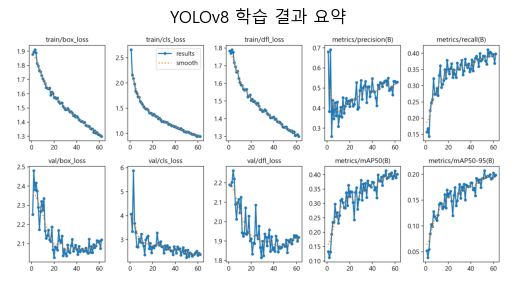

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_train2/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()


### 라벨 정리 & Tune

In [5]:
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("yolov8n.pt")

# 2. 학습 시작
model.train(
    data="FireSmokeDetection-4/data.yaml",
    epochs=120,
    imgsz = 768, # 이미지 크기 증가 (연기 표현 향상 예상)
    patience=15, # EarlyStoping 살짝 여유 있게
    batch=16, # 메모리에 따라 조절 (CPU=4~8, GPU=16~32)
    lr0=0.001, # 초기 학습률 낮게
    optimizer='AdamW', # 안정적 수렴
    dropout=0.1, # 경량 모델에서 과적합 방지
    warmup_epochs=3, # 초기 안정화
    device=0,
    project="runs", # 결과 저장 경로
    name="firesmoke_detect_tuned2", # 실험 이름
    resume=False # 중단된 학습 이어서 할 건지 여부
)

New https://pypi.org/project/ultralytics/8.3.153 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=FireSmokeDetection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_detect_tuned2, 

train: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels.cache... 4758 images, 23 backgrounds, 0 corrupt: 100%|██████████| 4758/4758 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 9582. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 0.10.0 ms, read: 200.749.7 MB/s, size: 44.1 KB)


val: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels.cache... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:00<?, ?it/s]


Plotting labels to runs\firesmoke_detect_tuned2\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs\firesmoke_detect_tuned2
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      2.95G      1.914       2.51      1.869         23        768: 100%|██████████| 298/298 [01:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.08it/s]

                   all       1087       1937      0.176      0.168      0.106     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      3.37G      1.861      2.076      1.839         12        768: 100%|██████████| 298/298 [01:09<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:18<00:00,  1.89it/s]


                   all       1087       1937      0.224      0.217      0.152     0.0526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      3.38G      1.862      2.013      1.832         25        768: 100%|██████████| 298/298 [01:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.10it/s]

                   all       1087       1937      0.486      0.193      0.213     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      3.38G      1.827      1.924      1.797         14        768: 100%|██████████| 298/298 [01:07<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.99it/s]


                   all       1087       1937      0.245      0.241      0.213     0.0954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      3.38G      1.769      1.811       1.76         16        768: 100%|██████████| 298/298 [01:07<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       1087       1937       0.69      0.219      0.262      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      3.38G      1.758      1.775      1.738         24        768: 100%|██████████| 298/298 [01:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.09it/s]

                   all       1087       1937       0.43      0.268      0.269       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      3.38G      1.718      1.694      1.696         12        768: 100%|██████████| 298/298 [01:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.11it/s]

                   all       1087       1937       0.37      0.315      0.276      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      3.38G      1.717      1.695      1.697         15        768: 100%|██████████| 298/298 [01:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]

                   all       1087       1937      0.374      0.301      0.281      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      3.38G      1.695      1.635      1.673         18        768: 100%|██████████| 298/298 [01:07<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.405      0.305      0.297      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      3.38G      1.679       1.61      1.655         27        768: 100%|██████████| 298/298 [01:07<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       1087       1937      0.486      0.245      0.273      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      3.38G      1.661      1.589      1.642         25        768: 100%|██████████| 298/298 [01:07<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       1087       1937      0.496       0.29      0.311      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      3.39G      1.644      1.528      1.634         21        768: 100%|██████████| 298/298 [00:47<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.70it/s]


                   all       1087       1937      0.377      0.297      0.273      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      3.39G      1.632      1.524      1.623         29        768: 100%|██████████| 298/298 [00:39<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]


                   all       1087       1937       0.36      0.291      0.264      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      3.39G      1.619      1.506      1.606         15        768: 100%|██████████| 298/298 [00:40<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]


                   all       1087       1937      0.437      0.337      0.328      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      3.39G      1.605      1.495      1.613         18        768: 100%|██████████| 298/298 [00:40<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.66it/s]


                   all       1087       1937      0.515      0.281      0.292      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      3.39G      1.619       1.48      1.615         11        768: 100%|██████████| 298/298 [00:40<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.81it/s]


                   all       1087       1937      0.455      0.319      0.322      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      3.39G      1.583      1.436      1.581         27        768: 100%|██████████| 298/298 [00:39<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.93it/s]


                   all       1087       1937      0.487      0.341      0.352      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      3.39G       1.58      1.413      1.568         15        768: 100%|██████████| 298/298 [00:39<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.79it/s]


                   all       1087       1937       0.38      0.293       0.28      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      3.39G      1.584      1.409       1.58         19        768: 100%|██████████| 298/298 [00:40<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.82it/s]


                   all       1087       1937      0.423      0.343      0.332      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      3.39G      1.561      1.373      1.552         12        768: 100%|██████████| 298/298 [00:39<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]


                   all       1087       1937       0.38      0.349      0.326      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      3.39G      1.562      1.398      1.569         20        768: 100%|██████████| 298/298 [00:39<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.97it/s]


                   all       1087       1937      0.496      0.355      0.358      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      3.39G       1.55      1.356      1.557         12        768: 100%|██████████| 298/298 [00:39<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.00it/s]


                   all       1087       1937      0.585      0.294      0.325      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      3.39G      1.543      1.342      1.552         18        768: 100%|██████████| 298/298 [00:39<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.86it/s]


                   all       1087       1937      0.404      0.327      0.316      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      3.39G      1.521      1.332      1.534         23        768: 100%|██████████| 298/298 [00:39<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.72it/s]

                   all       1087       1937      0.425      0.331      0.328      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      3.41G      1.525      1.306      1.535         19        768: 100%|██████████| 298/298 [00:39<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]


                   all       1087       1937      0.421       0.35      0.342      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      3.41G      1.506        1.3      1.526         14        768: 100%|██████████| 298/298 [00:39<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]


                   all       1087       1937      0.539      0.336      0.366      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      3.41G      1.517      1.286      1.521         30        768: 100%|██████████| 298/298 [00:39<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.90it/s]


                   all       1087       1937      0.509      0.359      0.368      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      3.41G      1.495      1.263      1.512         22        768: 100%|██████████| 298/298 [00:39<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]


                   all       1087       1937      0.458       0.37      0.363      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      3.41G      1.487      1.258      1.503         22        768: 100%|██████████| 298/298 [00:41<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]


                   all       1087       1937      0.464      0.339      0.351      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      3.41G      1.473      1.231      1.493         31        768: 100%|██████████| 298/298 [00:40<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.82it/s]


                   all       1087       1937      0.524      0.353       0.37      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      3.41G      1.489      1.251       1.51         10        768: 100%|██████████| 298/298 [00:39<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.86it/s]


                   all       1087       1937      0.517      0.347      0.365      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      3.41G      1.474      1.226      1.496         24        768: 100%|██████████| 298/298 [00:40<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.24it/s]

                   all       1087       1937      0.511      0.362       0.37      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      3.41G      1.469      1.216      1.484         17        768: 100%|██████████| 298/298 [00:40<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.80it/s]

                   all       1087       1937      0.527      0.338      0.366      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      3.41G      1.459       1.18      1.484         19        768: 100%|██████████| 298/298 [00:40<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.86it/s]

                   all       1087       1937       0.53      0.366      0.385      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      3.41G      1.455      1.185      1.467         26        768: 100%|██████████| 298/298 [00:40<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.61it/s]

                   all       1087       1937      0.464      0.364       0.37      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      3.41G      1.445      1.182      1.472         23        768: 100%|██████████| 298/298 [00:41<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.79it/s]

                   all       1087       1937      0.518      0.339      0.354       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      3.41G      1.431       1.16      1.462         22        768: 100%|██████████| 298/298 [00:39<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.92it/s]


                   all       1087       1937       0.51      0.379      0.377       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      3.41G      1.443      1.163      1.459          7        768: 100%|██████████| 298/298 [00:39<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.94it/s]


                   all       1087       1937      0.488      0.395      0.388      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      3.41G      1.428      1.154      1.453         10        768: 100%|██████████| 298/298 [00:39<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.88it/s]


                   all       1087       1937      0.481        0.4      0.388      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      3.41G      1.427      1.159      1.455         19        768: 100%|██████████| 298/298 [00:39<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]


                   all       1087       1937      0.494      0.363      0.384      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      3.41G       1.42      1.122      1.441         26        768: 100%|██████████| 298/298 [00:39<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.87it/s]


                   all       1087       1937      0.526      0.342      0.363      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      3.41G      1.409      1.118      1.441         16        768: 100%|██████████| 298/298 [00:39<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.93it/s]


                   all       1087       1937      0.492      0.391      0.391      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      3.41G      1.396      1.107      1.434         28        768: 100%|██████████| 298/298 [00:39<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.00it/s]


                   all       1087       1937      0.557      0.363      0.383       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      3.41G       1.39        1.1      1.422         11        768: 100%|██████████| 298/298 [00:39<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]


                   all       1087       1937      0.503      0.381      0.388      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      3.41G      1.382      1.097      1.422         20        768: 100%|██████████| 298/298 [00:39<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]

                   all       1087       1937      0.473      0.353      0.364       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      3.41G      1.378      1.087      1.424         21        768: 100%|██████████| 298/298 [00:39<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.00it/s]


                   all       1087       1937      0.562      0.385      0.398       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      3.41G      1.381      1.075      1.417         33        768: 100%|██████████| 298/298 [00:39<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.98it/s]


                   all       1087       1937       0.51      0.409      0.414      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      3.41G      1.363      1.048      1.408         27        768: 100%|██████████| 298/298 [00:39<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.91it/s]


                   all       1087       1937      0.498      0.416      0.409      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      3.41G      1.364      1.038      1.399         10        768: 100%|██████████| 298/298 [00:39<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.87it/s]


                   all       1087       1937      0.515      0.404       0.41      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      3.41G      1.359      1.036      1.399         25        768: 100%|██████████| 298/298 [00:40<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.89it/s]


                   all       1087       1937      0.486      0.406      0.398      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      3.41G      1.355      1.047      1.403         28        768: 100%|██████████| 298/298 [00:39<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.98it/s]


                   all       1087       1937       0.53      0.394      0.401      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      3.41G       1.35      1.026       1.39         37        768: 100%|██████████| 298/298 [00:39<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.95it/s]


                   all       1087       1937      0.523      0.409      0.414      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      3.41G      1.335      1.017       1.38         20        768: 100%|██████████| 298/298 [00:39<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.77it/s]


                   all       1087       1937      0.509      0.397      0.393      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      3.41G      1.344      1.018      1.385         14        768: 100%|██████████| 298/298 [00:39<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.38it/s]

                   all       1087       1937      0.508      0.425      0.415      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      3.41G      1.317     0.9954      1.371         26        768: 100%|██████████| 298/298 [00:40<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.84it/s]

                   all       1087       1937      0.585      0.415      0.436      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      3.41G      1.319     0.9897      1.371         24        768: 100%|██████████| 298/298 [00:40<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]


                   all       1087       1937      0.606      0.374       0.42      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      3.41G      1.313     0.9879      1.368         22        768: 100%|██████████| 298/298 [00:40<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.46it/s]

                   all       1087       1937      0.589      0.395      0.416      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      3.41G      1.318     0.9741      1.369         14        768: 100%|██████████| 298/298 [00:41<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.74it/s]


                   all       1087       1937      0.598      0.397      0.421      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      3.41G      1.302     0.9517      1.346         27        768: 100%|██████████| 298/298 [00:40<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.88it/s]


                   all       1087       1937      0.592      0.378      0.418      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      3.41G      1.311     0.9707      1.359         24        768: 100%|██████████| 298/298 [00:40<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.49it/s]

                   all       1087       1937      0.565      0.426      0.434      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      3.41G      1.304     0.9592      1.356         20        768: 100%|██████████| 298/298 [00:39<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.93it/s]

                   all       1087       1937      0.464      0.402      0.392      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      3.41G      1.282     0.9484      1.344         37        768: 100%|██████████| 298/298 [00:39<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]


                   all       1087       1937      0.539       0.41      0.423      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      3.41G      1.296     0.9602      1.348         26        768: 100%|██████████| 298/298 [00:39<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.07it/s]

                   all       1087       1937      0.535      0.407      0.407      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      3.41G      1.281     0.9448      1.338         22        768: 100%|██████████| 298/298 [00:39<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.03it/s]


                   all       1087       1937      0.595      0.367      0.411      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      3.41G      1.279     0.9403      1.343         17        768: 100%|██████████| 298/298 [00:39<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.03it/s]

                   all       1087       1937      0.561      0.387      0.415      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      3.42G      1.292     0.9277      1.332         20        768: 100%|██████████| 298/298 [00:39<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.99it/s]

                   all       1087       1937      0.519      0.398       0.41      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      3.42G      1.268     0.9106      1.329         14        768: 100%|██████████| 298/298 [00:39<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.03it/s]

                   all       1087       1937      0.531      0.422       0.42      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      3.42G      1.266     0.9099      1.331         11        768: 100%|██████████| 298/298 [00:39<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.71it/s]

                   all       1087       1937      0.561      0.403      0.419      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      3.42G      1.272     0.9163      1.334         12        768: 100%|██████████| 298/298 [00:40<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.86it/s]


                   all       1087       1937      0.514      0.425       0.41      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      3.42G      1.256     0.9021      1.326         16        768: 100%|██████████| 298/298 [01:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.76it/s]

                   all       1087       1937      0.521      0.418      0.417       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      3.42G      1.244     0.8837      1.313         14        768: 100%|██████████| 298/298 [00:45<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.54it/s]

                   all       1087       1937      0.507       0.41        0.4      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      3.42G      1.236      0.877      1.311         20        768: 100%|██████████| 298/298 [00:43<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.88it/s]


                   all       1087       1937      0.501      0.424      0.412      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      3.42G      1.244     0.8822      1.309         10        768: 100%|██████████| 298/298 [00:41<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]


                   all       1087       1937      0.585      0.391      0.419      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      3.42G      1.229      0.869      1.303         16        768: 100%|██████████| 298/298 [00:40<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]

                   all       1087       1937      0.536      0.415      0.418      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      3.42G      1.234     0.8854       1.31         16        768: 100%|██████████| 298/298 [00:40<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.63it/s]

                   all       1087       1937      0.507      0.399      0.405      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      3.42G      1.217     0.8621      1.298         31        768: 100%|██████████| 298/298 [00:40<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.64it/s]


                   all       1087       1937      0.489      0.414      0.412      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      3.42G      1.215     0.8488      1.293         23        768: 100%|██████████| 298/298 [00:40<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.60it/s]

                   all       1087       1937      0.561      0.417      0.422       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      3.42G      1.216     0.8525      1.291         21        768: 100%|██████████| 298/298 [00:40<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.53it/s]

                   all       1087       1937      0.499       0.44      0.421      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      3.42G      1.218      0.861      1.296         19        768: 100%|██████████| 298/298 [00:40<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.62it/s]


                   all       1087       1937      0.594      0.407      0.431      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      3.42G      1.197     0.8228      1.276         18        768: 100%|██████████| 298/298 [00:40<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.70it/s]


                   all       1087       1937      0.537      0.409      0.421      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      3.42G        1.2     0.8341      1.282         33        768: 100%|██████████| 298/298 [00:40<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]


                   all       1087       1937      0.532       0.42      0.425      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      3.42G      1.189     0.8229      1.274          8        768: 100%|██████████| 298/298 [00:42<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]

                   all       1087       1937      0.568      0.422       0.43      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      3.42G      1.195      0.833      1.277         17        768: 100%|██████████| 298/298 [00:40<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.56it/s]


                   all       1087       1937      0.565      0.426      0.431      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      3.42G      1.197     0.8281      1.274         13        768: 100%|██████████| 298/298 [00:40<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.63it/s]

                   all       1087       1937      0.557      0.442      0.441      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      3.42G      1.191     0.8069       1.27         25        768: 100%|██████████| 298/298 [00:40<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.65it/s]


                   all       1087       1937      0.571      0.418      0.425      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      3.42G      1.176     0.8067      1.266         16        768: 100%|██████████| 298/298 [00:40<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]


                   all       1087       1937      0.542      0.427      0.423      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      3.42G      1.177     0.8064      1.263         11        768: 100%|██████████| 298/298 [00:40<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.74it/s]


                   all       1087       1937      0.552      0.418      0.419      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      3.42G      1.163     0.7905      1.259          7        768: 100%|██████████| 298/298 [00:40<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.95it/s]


                   all       1087       1937      0.506      0.434      0.423      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      3.42G      1.159     0.7924      1.256         14        768: 100%|██████████| 298/298 [00:40<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.47it/s]

                   all       1087       1937      0.537      0.413      0.414       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      3.42G      1.161     0.7882      1.252         17        768: 100%|██████████| 298/298 [00:41<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.44it/s]

                   all       1087       1937      0.552      0.429      0.424      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      3.42G      1.154      0.786      1.249         24        768: 100%|██████████| 298/298 [00:40<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.47it/s]

                   all       1087       1937      0.561      0.414      0.429      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      3.42G       1.15     0.7907      1.244         27        768: 100%|██████████| 298/298 [00:40<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.85it/s]

                   all       1087       1937      0.535      0.417      0.419      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      3.42G      1.161     0.7906      1.253         18        768: 100%|██████████| 298/298 [00:40<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.58it/s]


                   all       1087       1937      0.605        0.4      0.429      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      3.42G      1.143     0.7771      1.247         17        768: 100%|██████████| 298/298 [00:40<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.54it/s]

                   all       1087       1937      0.615      0.404      0.434       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      3.42G      1.144     0.7623      1.242         25        768: 100%|██████████| 298/298 [00:40<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.39it/s]

                   all       1087       1937      0.575      0.396      0.421      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      3.42G      1.137     0.7571      1.241         27        768: 100%|██████████| 298/298 [00:58<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]

                   all       1087       1937      0.553      0.414      0.424      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      3.42G      1.133     0.7572      1.235         17        768: 100%|██████████| 298/298 [00:58<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:09<00:00,  3.43it/s]

                   all       1087       1937      0.572      0.417      0.421      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      3.42G      1.123     0.7447      1.224         20        768: 100%|██████████| 298/298 [01:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.16it/s]

                   all       1087       1937      0.553      0.426       0.42      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      3.42G      1.126     0.7451      1.228         20        768: 100%|██████████| 298/298 [01:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.21it/s]

                   all       1087       1937      0.564      0.406      0.421      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      3.42G      1.117     0.7397      1.226         27        768: 100%|██████████| 298/298 [00:59<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]

                   all       1087       1937      0.546      0.412      0.417      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      3.42G      1.126     0.7439      1.224         31        768: 100%|██████████| 298/298 [00:57<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.87it/s]

                   all       1087       1937      0.536       0.42      0.417      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      3.42G      1.111     0.7373      1.221         23        768: 100%|██████████| 298/298 [00:46<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.87it/s]

                   all       1087       1937      0.551      0.405       0.41      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      3.42G      1.105     0.7301      1.218         25        768: 100%|██████████| 298/298 [01:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.03it/s]

                   all       1087       1937      0.527      0.417      0.411      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      3.42G        1.1     0.7271      1.212         32        768: 100%|██████████| 298/298 [01:10<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.07it/s]

                   all       1087       1937      0.547      0.408      0.408      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      3.42G       1.09     0.7219      1.204         12        768: 100%|██████████| 298/298 [01:10<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.97it/s]

                   all       1087       1937      0.529      0.417       0.41      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      3.42G       1.08     0.7126      1.201         14        768: 100%|██████████| 298/298 [00:48<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:08<00:00,  3.82it/s]

                   all       1087       1937      0.532      0.416      0.412      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      3.42G      1.097     0.7125       1.21         26        768: 100%|██████████| 298/298 [01:06<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       1087       1937      0.559      0.407      0.417      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      3.42G      1.092     0.7184      1.208         17        768: 100%|██████████| 298/298 [01:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.05it/s]

                   all       1087       1937       0.55      0.432      0.425      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      3.42G       1.08     0.7206      1.211         29        768: 100%|██████████| 298/298 [01:11<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.66it/s]

                   all       1087       1937      0.549      0.425      0.422      0.214
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 94, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



109 epochs completed in 1.645 hours.
Optimizer stripped from runs\firesmoke_detect_tuned2\weights\last.pt, 6.3MB
Optimizer stripped from runs\firesmoke_detect_tuned2\weights\best.pt, 6.3MB

Validating runs\firesmoke_detect_tuned2\weights\best.pt...
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.13it/s]


                   all       1087       1937      0.618      0.406      0.435       0.22
                  fire        528       1123      0.654      0.584      0.598      0.333
                 smoke        728        814      0.582      0.228      0.271      0.108
Speed: 0.3ms preprocess, 1.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs\firesmoke_detect_tuned2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021B80FE9790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_detect_tuned2/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()


라벨 정리 전 탐지 2개
정리 후 탐지 2개
seg 2개

총 6개 중

라벨 정리 후 탐지 모델 튜닝한게 성능이 가장 좋았기 때문에 모델만 바꿔서 테스트

In [ ]:
model = YOLO("yolov8m.pt")

model.train(
    data="FireSmokeDetection-4/data.yaml",
    epochs=150,
    imgsz=768,
    batch=8,               # v8m은 크므로 GPU 메모리 상황 따라 조정
    lr0=0.0007,            # 낮은 초기 학습률
    optimizer="AdamW",
    dropout=0.1,
    warmup_epochs=5,
    weight_decay=0.0005,
    patience=25,
    name="firesmoke_yolov8m_tuned",
    device=0,
)


100%|██████████| 49.7M/49.7M [00:01<00:00, 39.2MB/s]


New https://pypi.org/project/ultralytics/8.3.153 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.146  Python-3.12.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=FireSmokeDetection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0007, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=firesmoke_yolov8m_tuned, 

train: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\train\labels.cache... 4758 images, 23 backgrounds, 0 corrupt: 100%|██████████| 4758/4758 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 9582. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 0.10.1 ms, read: 180.276.7 MB/s, size: 44.1 KB)


val: Scanning C:\Users\main\workspace\vision\project\FireSmokeDetection-4\valid\labels.cache... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:00<?, ?it/s]


Plotting labels to runs\detect\firesmoke_yolov8m_tuned\labels.jpg... 
optimizer: AdamW(lr=0.0007, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs\detect\firesmoke_yolov8m_tuned
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.65G      1.908      2.288      1.966         33        768: 100%|██████████| 595/595 [03:08<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:25<00:00,  2.66it/s]


                   all       1087       1937      0.229      0.188      0.137     0.0504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.67G      1.907       2.12      1.976         20        768: 100%|██████████| 595/595 [03:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:24<00:00,  2.77it/s]


                   all       1087       1937       0.32      0.258       0.21     0.0871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.78G      1.863       2.02      1.925         28        768: 100%|██████████| 595/595 [03:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:25<00:00,  2.63it/s]


                   all       1087       1937      0.256      0.242      0.185     0.0785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.77G      1.842       1.96      1.896         21        768: 100%|██████████| 595/595 [14:58<00:00,  1.51s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:16<00:00,  4.21it/s]

                   all       1087       1937      0.468       0.26      0.249      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.68G      1.813       1.92      1.885         24        768: 100%|██████████| 595/595 [02:54<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:24<00:00,  2.81it/s]


                   all       1087       1937      0.402      0.243      0.244      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.75G      1.779      1.876      1.849         18        768: 100%|██████████| 595/595 [02:52<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:24<00:00,  2.79it/s]

                   all       1087       1937      0.311      0.323      0.247      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.76G      1.746      1.782      1.827         21        768: 100%|██████████| 595/595 [36:19<00:00,  3.66s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:27<00:00,  2.45it/s]


                   all       1087       1937      0.348      0.267      0.257       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.76G      1.721      1.719      1.799          6        768: 100%|██████████| 595/595 [02:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:39<00:00,  1.74it/s]


                   all       1087       1937      0.391      0.306      0.286       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.76G      1.701      1.684      1.783         12        768: 100%|██████████| 595/595 [1:33:50<00:00,  9.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [15:37<00:00, 13.78s/it]


                   all       1087       1937      0.634      0.242      0.304      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.76G      1.671      1.635      1.756         24        768: 100%|██████████| 595/595 [1:46:01<00:00, 10.69s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▋       | 18/68 [02:58<06:30,  7.81s/it]

WARNING NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 34/68 [7:58:01<35:31:54, 3762.18s/it]

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows는 맑은 고딕
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # macOS일 경우

# 마이너스 부호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

img = Image.open("runs/firesmoke_yolov8m_tuned/results.png")
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 학습 결과 요약")
plt.show()
